In [23]:
import pandas as pd

path = "/home/peterchen/M2/Graduation/MER2024/MERLIN(332).xlsx"

df = pd.read_excel(path)

In [24]:
rank_cols = ["rank_1", "rank_2", "rank_3", "rank_4", "rank_5"]

def replace_after_first_one(row):
    for i, col in enumerate(rank_cols):
        if row[col] == 1:
            for j in range(i, len(rank_cols)):
                row[rank_cols[j]] = 1
            break
    return row

df = df.apply(replace_after_first_one, axis=1)
df.to_excel(path, index=False)

In [27]:
len(df)

332

In [26]:
import pandas as pd

df = pd.read_excel(path)

num_queries = len(df)
for turn in range(6):
    rank_col_name = "initial_rank" if turn == 0 else f"rank_{turn}"
    if rank_col_name not in df.columns:
        print(f"Round {turn} (Column: {rank_col_name}) 数据不存在，跳过 Recall 计算")
        continue
    
    r1 = (df[rank_col_name].apply(lambda x: pd.NA if x is None else x) ==1).sum() / num_queries * 100
    r5 = (df[rank_col_name].apply(lambda x: pd.NA if x is None else x) <=5).sum() / num_queries * 100
    r10 = (df[rank_col_name].apply(lambda x: pd.NA if x is None else x) <=10).sum() / num_queries * 100
    
    print(f"Round {turn} ({rank_col_name}): ")
    print(f"  Recall@1: {r1:.2f}%")
    print(f"  Recall@5: {r5:.2f}%")
    print(f"  Recall@10: {r10:.2f}%")    

Round 0 (initial_rank): 
  Recall@1: 16.57%
  Recall@5: 35.24%
  Recall@10: 46.99%
Round 1 (rank_1): 
  Recall@1: 12.95%
  Recall@5: 31.63%
  Recall@10: 37.95%
Round 2 (rank_2): 
  Recall@1: 18.98%
  Recall@5: 28.92%
  Recall@10: 36.75%
Round 3 (rank_3): 
  Recall@1: 23.19%
  Recall@5: 29.82%
  Recall@10: 38.55%
Round 4 (rank_4): 
  Recall@1: 25.90%
  Recall@5: 33.13%
  Recall@10: 39.76%
Round 5 (rank_5): 
  Recall@1: 28.31%
  Recall@5: 34.34%
  Recall@10: 43.37%


In [1]:
import pandas as pd

# 读取Excel文件
df = pd.read_excel("/home/peterchen/M2/Graduation/MAFW/merged_mafw_data_adjusted.xlsx")

# 提取video_name为10198的行
target_row = df[df['video_name'] == 10198]

# 获取列名
columns = df.columns.tolist()

# 获取该行数据
row_data = target_row.iloc[0].to_dict()

print("列名:", columns)
print("数据:", row_data)

列名: ['video_name', 'initial_rank', 'strategy_1', 'question_1', 'answer_1', 'rank_1', 'top10_1', 'strategy_2', 'question_2', 'answer_2', 'rank_2', 'top10_2', 'strategy_3', 'question_3', 'answer_3', 'rank_3', 'top10_3', 'strategy_4', 'question_4', 'answer_4', 'rank_4', 'top10_4', 'strategy_5', 'question_5', 'answer_5', 'rank_5', 'top10_5']
数据: {'video_name': 10198, 'initial_rank': 88, 'strategy_1': 'ask_macro', 'question_1': 'The refined description of the video would be: A person is crying and covering their face with their hands.', 'answer_1': 'The image shows a person in a dimly lit environment, possibly at night, with a blueish tint to the lighting. The person appears to be in distress or shock, as indicated by their wide eyes and open mouth. Subtitles in Chinese are present at the bottom of the image, which translate to "Do you want to know why? Because the shark bit off his head." This suggests that the scene might be from a dramatic or horror context, possibly involving a supernat

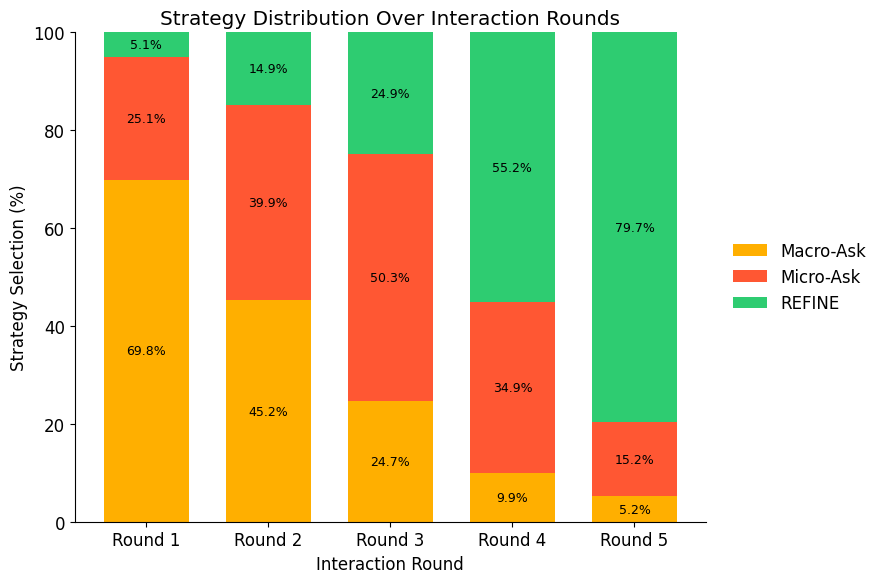

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Use a system-safe font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Data
rounds = ['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5']
ask_macro = np.array([69.78, 45.21, 24.71, 9.89, 5.16])
ask_micro = np.array([25.13, 39.88, 50.34, 34.92, 15.16])
refine     = np.array([5.09, 14.91, 24.95, 55.19, 79.68])

# Chart setup
width = 0.7
x = np.arange(len(rounds))

# High-contrast, more vibrant colors
colors = {
    'Macro-Ask': '#FFAF00',  # stronger blue
    'Micro-Ask': '#FF5733',  # vibrant orange-red
    'REFINE'   : '#2ECC71'   # bright green
}

fig, ax = plt.subplots(figsize=(9, 6))

# Plot
ax.bar(x, ask_macro, width, label='Macro-Ask', color=colors['Macro-Ask'])
ax.bar(x, ask_micro, width, bottom=ask_macro, label='Micro-Ask', color=colors['Micro-Ask'])
ax.bar(x, refine,     width, bottom=ask_macro+ask_micro, label='REFINE',  color=colors['REFINE'])

# Axes and layout
ax.set_xlabel('Interaction Round')
ax.set_ylabel('Strategy Selection (%)')
ax.set_title('Strategy Distribution Over Interaction Rounds')
ax.set_xticks(x)
ax.set_xticklabels(rounds)
ax.set_ylim(0, 100)
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)

# Use consistent black text for all bars
for xi in range(len(x)):
    y_offset = 0
    for value in [ask_macro[xi], ask_micro[xi], refine[xi]]:
        if value > 5:
            ax.text(xi, y_offset + value/2, f'{value:.1f}%', ha='center', va='center',
                    color='black', fontsize=9)
        y_offset += value

# Clean look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


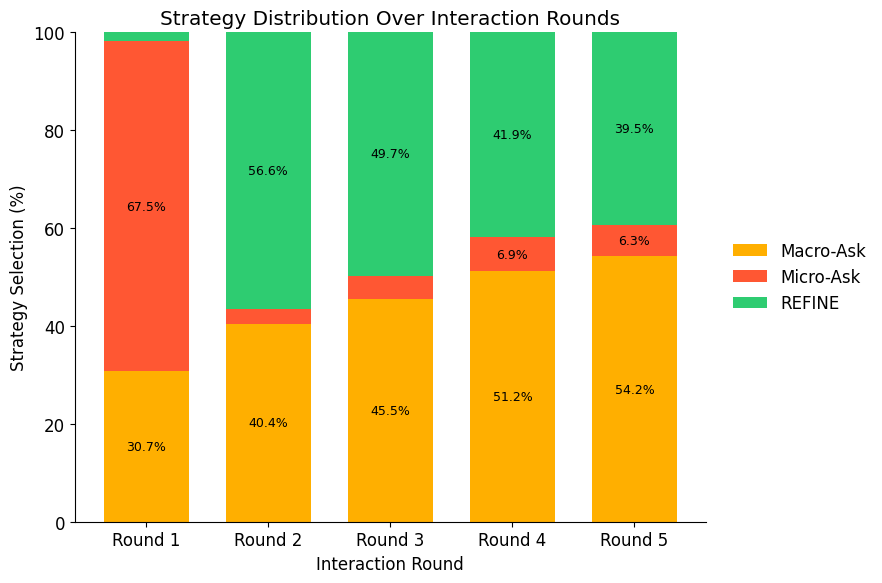

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Set font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Updated Data
rounds = ['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5']
ask_macro = np.array([30.72, 40.36, 45.48, 51.20, 54.22])
ask_micro = np.array([67.47, 3.01, 4.82, 6.93, 6.33])
refine     = np.array([1.81, 56.63, 49.70, 41.87, 39.46])

# Chart setup
width = 0.7
x = np.arange(len(rounds))

# Colors
colors = {
    'Macro-Ask': '#FFAF00',  # vivid amber
    'Micro-Ask': '#FF5733',  # vibrant orange-red
    'REFINE'   : '#2ECC71'   # bright green
}

fig, ax = plt.subplots(figsize=(9, 6))

# Plot stacked bars
ax.bar(x, ask_macro, width, label='Macro-Ask', color=colors['Macro-Ask'])
ax.bar(x, ask_micro, width, bottom=ask_macro, label='Micro-Ask', color=colors['Micro-Ask'])
ax.bar(x, refine, width, bottom=ask_macro+ask_micro, label='REFINE', color=colors['REFINE'])

# Axis and title
ax.set_xlabel('Interaction Round')
ax.set_ylabel('Strategy Selection (%)')
ax.set_title('Strategy Distribution Over Interaction Rounds')
ax.set_xticks(x)
ax.set_xticklabels(rounds)
ax.set_ylim(0, 100)
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)

# Annotate with consistent black text
for xi in range(len(x)):
    y_offset = 0
    for value in [ask_macro[xi], ask_micro[xi], refine[xi]]:
        if value > 5:
            ax.text(xi, y_offset + value/2, f'{value:.1f}%', ha='center', va='center',
                    color='black', fontsize=9)
        y_offset += value

# Clean up
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()
